In [1]:
import networkx as nx
import matplotlib.pyplot as plt

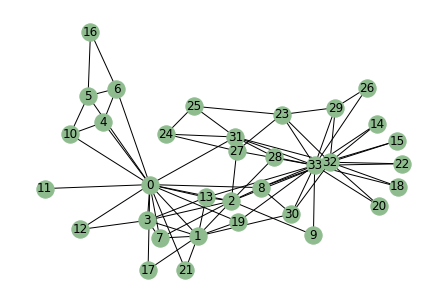

In [11]:
K = nx.karate_club_graph()
nx.draw(K, node_color='darkseagreen', with_labels=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/DATA 440 - Web Science/KC_original.png',bbox_inches='tight')

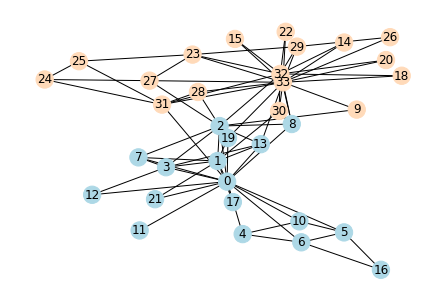

In [7]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'lightblue',
    'Officer': 'peachpuff',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/DATA 440 - Web Science/KC_clubs.png',bbox_inches='tight')

In [8]:
def girvan_newman(graph):
  # find number of connected components
  partitions = nx.connected_components(graph)
  cluster_count = nx.number_connected_components(graph)
  count = 0

  while(cluster_count == 1):
    # calculate betweenness and afind edge with the highest
    edge_betweenness = nx.edge_betweenness_centrality(graph)
    edge_to_remove = max(graph.edges(), key=edge_betweenness.get)
    
    # replace the color in edge_color_list with red if the edge has the maximum betweenness:
    edge_color_list = ["black"]*len(graph.edges)
    for i, edge in enumerate(graph.edges()):
        if edge == edge_to_remove or (edge[1],edge[0]) == edge_to_remove:
            edge_color_list[i] = 'red'

    # find the nodes forming the connected components
    partition_nodes = []
    for node in partitions:
        partition_nodes.append(list(node))

    # create color map to show connected components
    color_map = []
    for node in graph:
        if node in partition_nodes[0]:
            color_map.append('lightblue')
        else: 
            color_map.append('peachpuff') 

    # plot the graph
    plt.figure(count)
    nx.draw(graph, node_color=color_map, edge_color = edge_color_list, with_labels=True)

    # update the number of connected components
    cluster_count = nx.number_connected_components(graph)
    partitions = nx.connected_components(graph)

    # save each graph
    plt.tight_layout()
    plt.title('Iteration: {}, Clusters: {}'.format(count, cluster_count))
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/DATA 440 - Web Science/KC_GN{}.png'.format(count),bbox_inches='tight')

    # remove the edge with the highest betweenness 
    graph.remove_edge(edge_to_remove[0], edge_to_remove[1])

    count+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


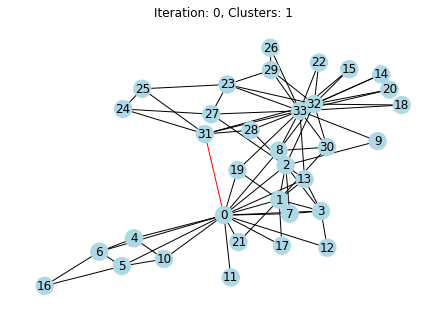

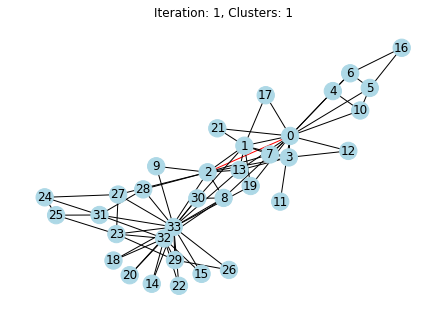

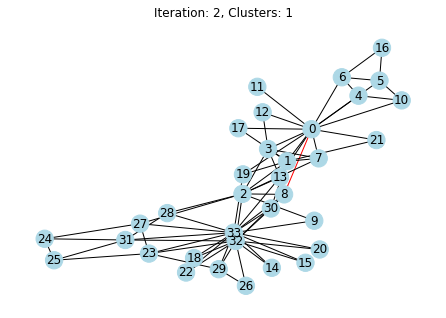

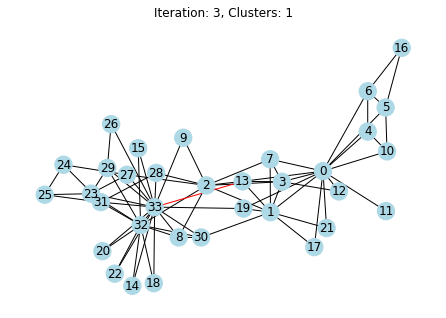

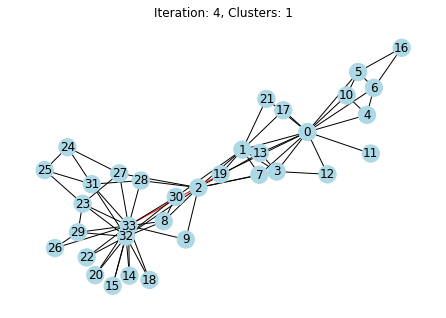

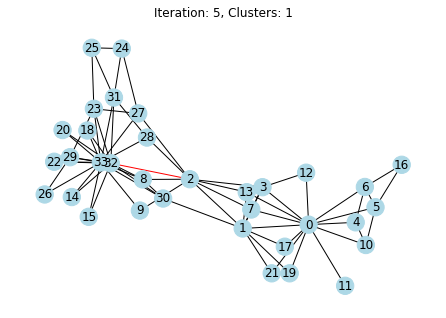

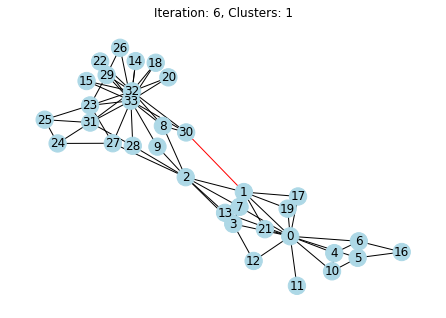

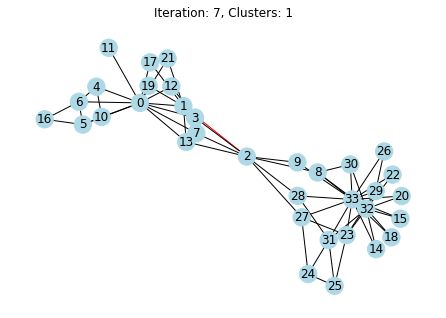

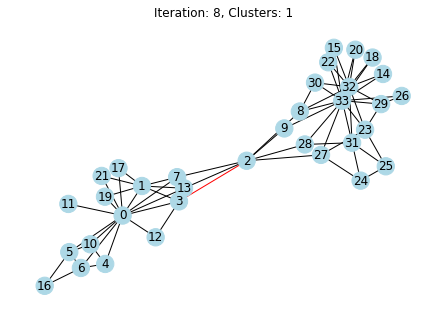

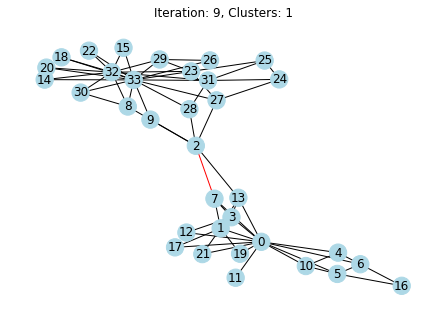

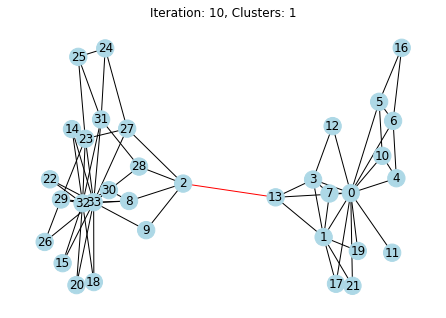

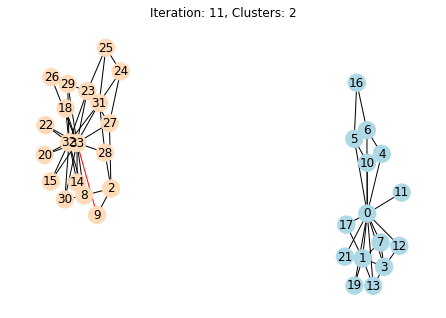

In [9]:
# load the graph
KC = nx.karate_club_graph()
# run girvan-newman algorithm
girvan_newman(KC.copy())